# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *J*

**Names:**

* *Rafael Bischof*
* *Jeniffer Lima Graf*
* *Alexander Sanchez*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [101]:
import csv
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [11]:
components = nx.read_adjlist("../data/components.graph", create_using=nx.DiGraph())
absorbing = nx.read_adjlist("../data/absorbing.graph", create_using=nx.DiGraph())

In [12]:
def random_walk(G, iterations):
    pages_count = np.zeros(G.number_of_nodes())
    n = np.random.choice(G.nodes())
    
    for i in range(iterations):
        pages_count[int(n)] += 1
        neighbours = list(G.neighbors(n))
        if len(neighbours) > 0:
            n = np.random.choice(neighbours)
        
    return pages_count

In [13]:
def print_page_counts(counts):
    for i in range(len(counts)):
        print(i, ':', counts[i])

In [27]:
iterations = 1000

print_page_counts(random_walk(components, iterations))

0 : 282.0
1 : 282.0
2 : 282.0
3 : 154.0
4 : 0.0
5 : 0.0
6 : 0.0
7 : 0.0


In [28]:
print_page_counts(random_walk(absorbing, iterations))

0 : 0.0
1 : 996.0
2 : 2.0
3 : 2.0
4 : 0.0


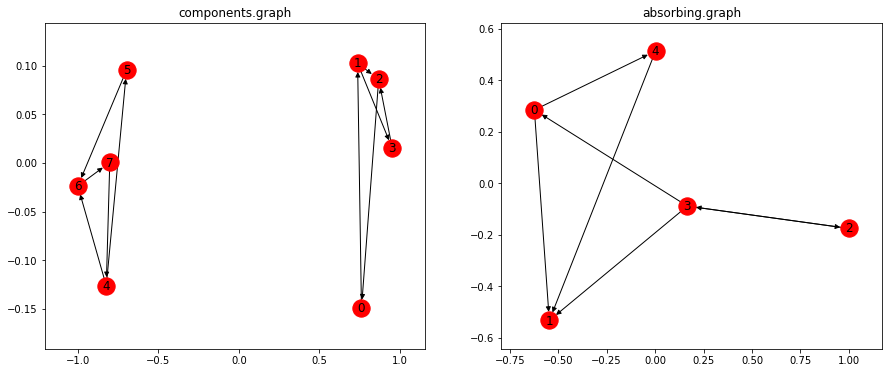

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("components.graph")
nx.draw_networkx(components, arrows=True)

plt.subplot(1,2,2)
plt.title("absorbing.graph")
nx.draw_networkx(absorbing, arrows=True)

### Explanation
The components graph has two separate connected components. Therefore the random surfer will never leave the component that it randomly selected at the start.<br>
The absorbing graph has (as its name says) an absorbing node (node 1). Once the random surfer reaches this node, it will never leave it again.

#### Exercise 2.13

In [30]:
def random_walk_teleportation(G, iterations, teleportation_prob=.15):
    pages_count = np.zeros(G.number_of_nodes())
    n = np.random.choice(G.nodes())
    
    for i in range(iterations):
        pages_count[int(n)] += 1
        neighbours = list(G.neighbors(n))
        if len(neighbours) > 0 and np.random.rand(1) > teleportation_prob:
            n = np.random.choice(neighbours)
        else:
            n = np.random.choice(G.nodes())
        
    return pages_count

In [31]:
print_page_counts(random_walk_teleportation(components, iterations))

0 : 146.0
1 : 140.0
2 : 153.0
3 : 75.0
4 : 126.0
5 : 82.0
6 : 147.0
7 : 131.0


In [32]:
print_page_counts(random_walk_teleportation(absorbing, iterations))

0 : 159.0
1 : 367.0
2 : 133.0
3 : 185.0
4 : 156.0


---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [153]:
wiki = nx.read_adjlist("../data/wikipedia.graph", create_using=nx.DiGraph())
titles
with open('../data/wikipedia_titles.tsv') as tsvfile:
    titles = list(csv.reader(tsvfile, delimiter='\t'))

In [144]:
def transition_matrix(graph):
    H = np.zeros((graph.number_of_nodes(), graph.number_of_nodes()))
    edges = list(graph.edges)
    for u,v in edges:
        H[int(u)][int(v)] = 1 / len(list(graph.neighbors(u)))
    
    return H

In [145]:
def dangling_nodes(graph):
    nodes = list(graph.nodes)
    return np.array(list(map(lambda n : len(list(graph.neighbors(n))) < 1, nodes)))

In [146]:
def G(graph, teleportation=.15):
    N = graph.number_of_nodes()
    H_caret = transition_matrix(graph) + np.ones((N, N)) * dangling_nodes(graph)[..., np.newaxis] / N
    return teleportation * H_caret + (1 - teleportation) * np.ones((N, N)) / N

In [147]:
def power_iteration(G, iterations):
    N = G.shape[1]
    pi = np.ones(N) / N
    
    for i in range(iterations):
        pi = np.dot(pi, G)
        pi /= np.linalg.norm(pi)
    
    return pi

In [148]:
page_rank = power_iteration(G(wiki), 1000)

In [164]:
ranks = np.argsort(page_rank)[::-1]
top_titles = [(page_rank[r], titles[r][1]) for r in ranks[:10]]
for i in range(10):
    index = ranks[i]
    print(i+1, ':', page_rank[index], titles[index][1])

1 : 0.1301179399210477 United States House of Representatives
2 : 0.0915594978075939 United for Peace and Justice
3 : 0.08213020709893927 England expects that every man will do his duty
4 : 0.07587040453502215 Fraction (mathematics)
5 : 0.07341986757861871 European Union
6 : 0.06929111314831508 Bioinformatics
7 : 0.0629693283026976 Animal Farm
8 : 0.060647109037963415 World War I
9 : 0.05972649455165224 London Heathrow Airport
10 : 0.059646744437520674 German reunification


---

### 2.4.3 Gaming the system

#### Exercise 2.15